# 📊 Data Preprocessing for IoT Time Series Forecasting
In this notebook, we will:
- Load the **ETTh1** IoT sensor dataset
- Perform basic **exploration** and **visualization**
- Handle **missing values**
- Apply **normalization**
- Detect simple **anomalies** using statistical methods

In [10]:
# 📥 Step 1: Load dataset from local file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# Load CSV from local path
df = pd.read_csv('../data/raw/ETTH1.csv', parse_dates=['date'])
df.set_index('date', inplace=True)
df.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [11]:
# 📤 Step 1.5: Split into Train, Val, Test (80%, 10%, 10%) by timestamp
n = len(df)
train_end = int(n * 0.8)
val_end = int(n * 0.9)

train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

print(f"Train: {train_df.shape}, Val: {val_df.shape}, Test: {test_df.shape}")

Train: (13936, 7), Val: (1742, 7), Test: (1742, 7)


Shape: (17420, 7)
               HUFL          HULL          MUFL          MULL          LUFL  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean       7.375141      2.242242      4.300239      0.881568      3.066062   
std        7.067744      2.042342      6.826978      1.809293      1.164506   
min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
50%        8.774000      2.210000      5.970000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.625000   
max       23.643999     10.114000     17.341000      7.747000      8.498000   

               LULL            OT  
count  17420.000000  17420.000000  
mean       0.856932     13.324672  
std        0.599552      8.566946  
min       -1.371000     -4.080000  
25%        0.670000      6.964000  
50%        0.975000     11.396000  
75%        1.21800

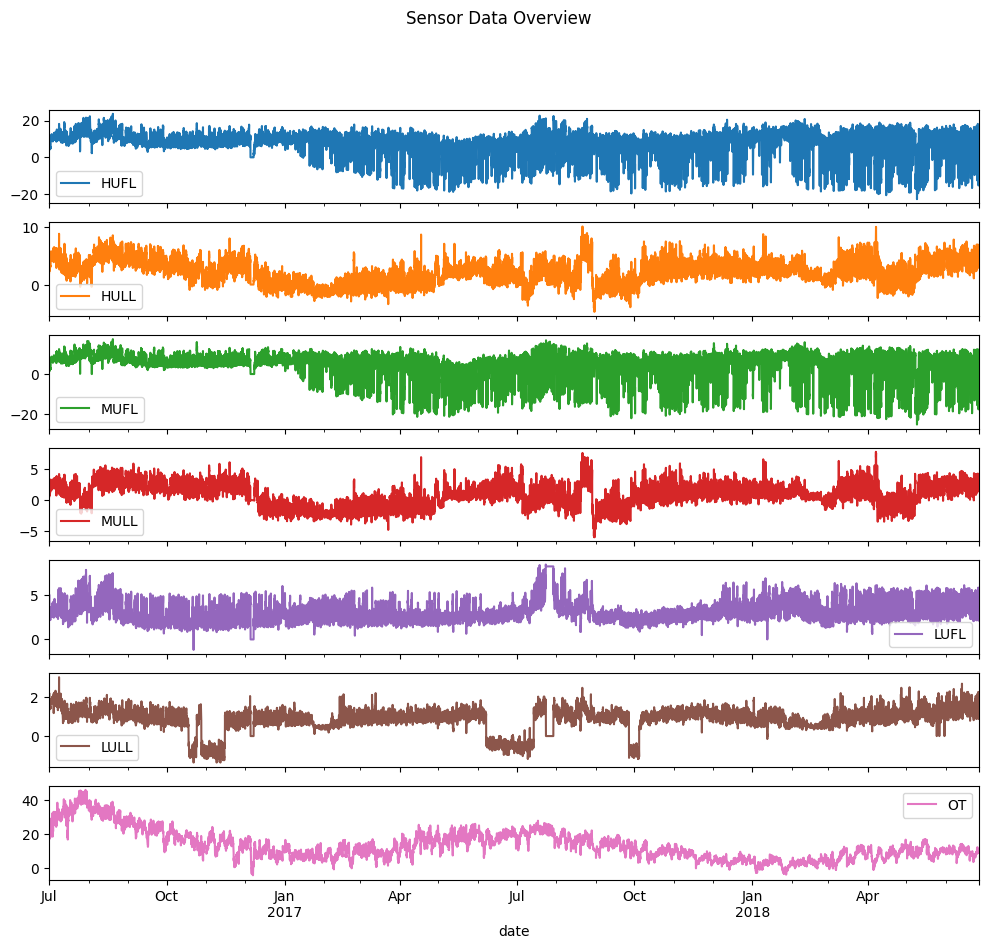

In [12]:
# 📈 Step 2: Explore the dataset
print(f"Shape: {df.shape}")
print(df.describe())
df.plot(subplots=True, figsize=(12, 10), title='Sensor Data Overview');

In [13]:
# 🧼 Step 3: Handle missing values (Linear Interpolation)
def handle_missing(data):
    before = data.isna().sum()
    data = data.interpolate(method='linear')
    after = data.isna().sum()
    print("Missing Before:\n", before)
    print("Missing After:\n", after)
    return data


train_df = handle_missing(train_df)
val_df = handle_missing(val_df)
test_df = handle_missing(test_df)

Missing Before:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
Missing After:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
Missing Before:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
Missing After:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
Missing Before:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
Missing After:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64


In [14]:
# 🔃 Step 4: Normalize using MinMaxScaler (fit only on train set)

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_df)
val_scaled = scaler.transform(val_df)
test_scaled = scaler.transform(test_df)


train_scaled_df = pd.DataFrame(train_scaled, index=train_df.index, columns=train_df.columns)
val_scaled_df = pd.DataFrame(val_scaled, index=val_df.index, columns=val_df.columns)
test_scaled_df = pd.DataFrame(test_scaled, index=test_df.index, columns=test_df.columns)


Total anomalies detected in train set: 1060


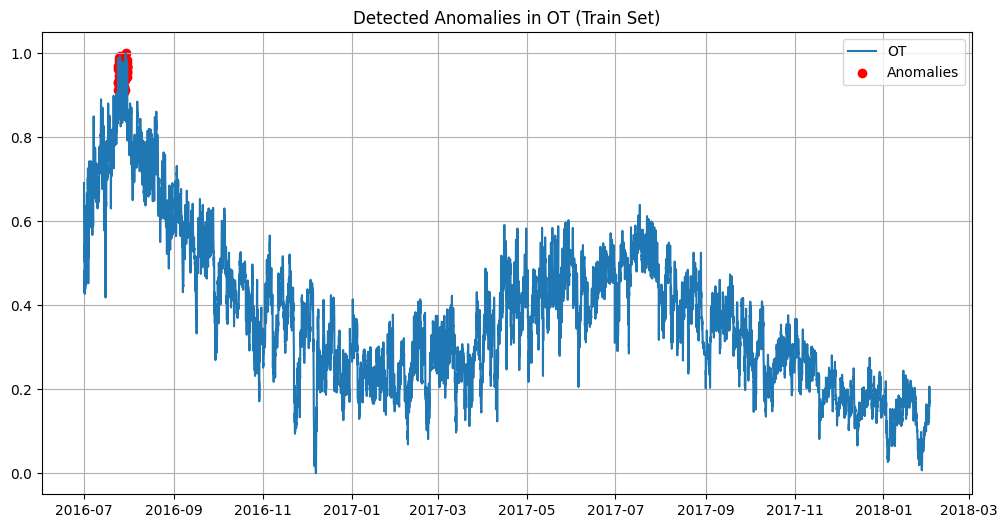

In [15]:
# 🚨 Step 5: Anomaly Detection on Train Set (Z-score)
z_scores = np.abs(zscore(train_scaled_df))
anomalies = (z_scores > 3)
print(f"Total anomalies detected in train set: {anomalies.sum().sum()}")


# Visualize OT column with anomalies
plt.figure(figsize=(12, 6))
plt.plot(train_scaled_df['OT'], label='OT')
ot_index = train_scaled_df.columns.get_loc('OT')
plt.scatter(train_scaled_df.index[anomalies[:, ot_index]], 
            train_scaled_df['OT'][anomalies[:, ot_index]],
            color='red', label='Anomalies')
plt.legend()
plt.title('Detected Anomalies in OT (Train Set)')
plt.grid(True)
plt.show()

In [16]:
# 💾 Save Cleaned and Scaled Data

train_scaled_df.to_csv('../data/processed/etth1_train.csv')
val_scaled_df.to_csv('../data/processed/etth1_val.csv')
test_scaled_df.to_csv('../data/processed/etth1_test.csv')

print("✅ Saved processed splits to data/processed/")

✅ Saved processed splits to data/processed/


In [17]:
# ✅ Display summaries
print("\nRaw Data (Head):")
print(df.head())

print("\nProcessed Train Data (Head):")
print(train_scaled_df.head())

print("\nChanges Summary:")

print("1. Read from local CSV: ../data/raw/ETTH1.csv")
print("2. Split data by timestamp into 80% train, 10% val, 10% test.")
print("3. Interpolated missing values (linear).")
print("4. The raw data has been normalized to a range of [0, 1] using MinMaxScaler.")
print("5. Z-score anomaly detection performed on 'OT'.")


Raw Data (Head):
                      HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

Processed Train Data (Head):
                         HUFL      HULL      MUFL      MULL      LUFL  \
date                                                                    
2016-07-01 00:00:00  0.588227  0.454943  0.599461  0.473673  0.556576   
2016-07-01 01:00:00  0.585130  0.459449  0.596738  0.471006  0.550279   
2016-07-01 02:00:00  0.572743  0.436920  0.591319  0.465748  0.512595   
2016-07-01 03:00:00  0.571194  0.450437  0.591319  0.468414  0.515693   
201